In [1]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from math import ceil

In [2]:
B, T, D = 14, 20770, 64
cond_num = 1
update_ix = np.load('C:\\Users\\kdmen\\Desktop\\Research\\Data\\update_ix.npy')
starting_update = 10
final_update = 17
batch_size = 128

class CustomTimeSeriesDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        #return (self.data.shape[-1])
        return (self.data.shape[1]) # This only works for 2D inputs I think...

    def __getitem__(self, idx):
        # Assuming 'data' and 'labels' are lists of numpy arrays
        sample_data = self.data[:,idx]
        sample_labels = self.labels[:,idx]
        # You can apply any custom logic here based on the specific requirements of your task
        # Convert to PyTorch tensors
        sample_data = torch.Tensor(sample_data)
        sample_labels = torch.Tensor(sample_labels)
        return sample_data, sample_labels

# Load Data
print("Loading Data")
input_data = None
target_data = None
data_path = r"C:\\Users\\kdmen\\Desktop\\Research\\Data\\Client_Specific_Files"
for i in range(14):
    datafile = "UserID" + str(i) + "_TrainData_8by20770by64.npy"
    full_data = np.load(data_path+"\\"+datafile)
    cond_data = full_data[cond_num-1, update_ix[starting_update]:update_ix[final_update], :]
    data = np.transpose(cond_data)
    if input_data is None:
        input_data = data
    else:
        input_data = np.vstack((input_data, data))

    labelfile = "UserID" + str(i) + "_Labels_8by20770by2.npy"
    full_data = np.load(data_path+"\\"+labelfile)
    cond_data = full_data[cond_num-1, update_ix[starting_update]:update_ix[final_update], :]
    data = np.transpose(cond_data)
    if target_data is None:
        target_data = data
    else:
        target_data = np.vstack((target_data, data))

#################

test_split_idx = ceil(input_data.shape[1]*.8)
test_data = torch.tensor(input_data[:, test_split_idx:], dtype=torch.float)
test_labels = torch.tensor(target_data[:, test_split_idx:], dtype=torch.float)
train_data = torch.tensor(input_data[:, :test_split_idx], dtype=torch.float)
train_labels = torch.tensor(target_data[:, :test_split_idx], dtype=torch.float)
print("Data loaded!")

#################

# Convert data to DataLoader
print("Create custom datasets")
train_dataset = CustomTimeSeriesDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_dataset = CustomTimeSeriesDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
inference_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
print("Datasets and dataloaders created!")

Loading Data
Data loaded!
Create custom datasets
Datasets and dataloaders created!


In [3]:
print(train_data.shape)
print(train_labels.shape)

torch.Size([896, 6732])
torch.Size([28, 6732])


In [4]:
train_i = 0
for i, (batch_data, batch_labels) in enumerate(train_loader):
    print(f"Batch {i + 1} - Data Shape: {batch_data.shape}, Labels Shape: {batch_labels.shape}")
    train_i += 1
print(train_i)

print()

test_i = 0
for i, (batch_data, batch_labels) in enumerate(test_loader):
    print(f"Batch {i + 1} - Data Shape: {batch_data.shape}, Labels Shape: {batch_labels.shape}")
    test_i += 1
print(test_i)

print()

inf_i = 0
for i, (batch_data, batch_labels) in enumerate(inference_loader):
    print(f"Batch {i + 1} - Data Shape: {batch_data.shape}, Labels Shape: {batch_labels.shape}")
    inf_i += 1
print(inf_i)

Batch 1 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 2 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 3 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 4 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 5 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 6 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 7 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 8 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 9 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 10 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 11 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 12 - Data Shape: torch.Size([128, 896]), Labels Shape: torch.Size([128, 28])
Batch 13 - Da

In [5]:
# Initialize the model
input_size = D  # Number of features in the input data
output_size = 2  # Number of dimensions in the output labels

## Linear Regression

Epoch [1/100], Loss: nan
Epoch [11/100], Loss: nan
Epoch [21/100], Loss: nan
Epoch [31/100], Loss: nan
Epoch [41/100], Loss: nan
Epoch [51/100], Loss: nan
Epoch [61/100], Loss: nan
Epoch [71/100], Loss: nan
Epoch [81/100], Loss: nan
Epoch [91/100], Loss: nan


ValueError: x and y must have same first dimension, but have shapes (100,) and (5300,)

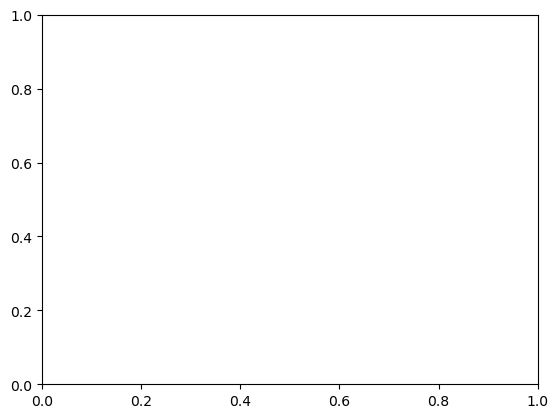

In [6]:
# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(input_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
train_loss_log = []
for epoch in range(num_epochs):
    for batch_data, batch_labels in train_loader:
        # Flatten the input data
        batch_data = batch_data.view(-1, input_size)

        # Forward pass
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels.view(-1, output_size))
        train_loss_log.append(loss.item())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch%10==0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the training loss over epochs
plt.plot(range(1, num_epochs+1), train_loss_log, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
# Testing loop
model.eval()
with torch.no_grad():
    total_loss = 0
    for batch_data, batch_labels in test_loader:
        print(batch_data.shape)
        batch_data = batch_data.view(-1, input_size)
        print(batch_data.shape)
        outputs = model(batch_data)
        print(outputs.shape)
        total_loss += criterion(outputs, batch_labels.view(-1, output_size)).item()
        print()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')

In [ ]:
plt.plot(outputs[:,0])
plt.plot(batch_labels.view(-1, output_size)[:,0])

Single at a time

In [ ]:
# Testing loop
model.eval()
outputs_log = []
labels_log = []
with torch.no_grad():
    total_loss = 0
    for batch_data, batch_labels in test_loader:
        print(f"batch_data.shape: {batch_data.shape}")
        for user_num in range(batch_data.shape[0]):
            user1_seq_data = batch_data[user_num,:,:]
            user1_seq_labels = batch_labels[user_num,:,:]
            print(f"user1_seq_data.shape: {user1_seq_data.shape}")
            iter_i = 0
            for (one_seq, one_seq_label) in zip(user1_seq_data, user1_seq_labels):
                iter_i += 1
                outputs = model(one_seq)
                outputs_log.append(outputs[0].item())
                labels_log.append(one_seq_label[0].item())
                if iter_i%1000==0:
                    #print(f"outputs.shape: {outputs.shape}")
                    print(f"{outputs}, {one_seq_label}")
                total_loss += criterion(outputs, one_seq_label).item()
            print()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')

In [ ]:
plt.plot(outputs_log)
plt.plot(labels_log)

> Above, I show that you get the same outputs when you use the same model, whether or not you compute all the data at once (eg the default) or doing it one by one

## RNN

In [ ]:
#input_size = D  # Number of features in the input data
#output_size = 2  # Number of dimensions in the output labels
hidden_size = 64

In [ ]:
# Define a simple RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # RNN input: (batch_size, seq_len, input_size)
        # Output: (batch_size, seq_len, hidden_size)
        rnn_out, _ = self.rnn(x)

        # Fully connected layer
        output = self.fc(rnn_out)
        return output

# Initialize the RNN model
rnn_model = RNNModel(D, hidden_size, 2)  # Change output_size to 2

# Define loss function and optimizer for the RNN model
rnn_criterion = nn.MSELoss()
rnn_optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

# Training loop for the RNN model
rnn_train_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    rnn_epoch_losses = []
    batch_counter = 0
    for batch_data, batch_labels in train_loader:
        #print(f"Pre-reshape batch_data size: {batch_data.shape}")
        # Reshape the input data to (batch_size, seq_len, input_size)
        #batch_data = batch_data.permute(0, 2, 1)
        #print(f"Post-reshape batch_data size: {batch_data.shape}")

        # Make sure the input size matches the RNN input size
        assert batch_data.size(-1) == D, f"Expected input size {D}, got {batch_data.size(-1)}"

        # Forward pass
        rnn_outputs = rnn_model(batch_data)

        if epoch==0:
            print(f"Batch {batch_counter}. batch_data size: {batch_data.shape}. batch_labels size: {batch_labels.shape}. rnn_outputs size: {rnn_outputs.shape}.")
        batch_counter += 1
        
        rnn_loss = rnn_criterion(rnn_outputs, batch_labels)

        # Backward and optimize
        rnn_optimizer.zero_grad()
        rnn_loss.backward()
        rnn_optimizer.step()

        rnn_epoch_losses.append(rnn_loss.item())

    average_rnn_epoch_loss = sum(rnn_epoch_losses) / len(rnn_epoch_losses)
    rnn_train_losses.append(average_rnn_epoch_loss)
    if epoch%10==0:
        print(f'RNN Epoch [{epoch+1}/{num_epochs}], Loss: {average_rnn_epoch_loss:.4f}')

# Plot the training loss for the RNN model over epochs
plt.plot(range(1, num_epochs+1), rnn_train_losses, label='RNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Training Loss Over Epochs')
plt.legend()
plt.show()


In [ ]:
print("TRAIN LOADER")
model.eval()
with torch.no_grad():
    dim0 = 0
    dim1 = 0
    dim2 = 0
    batch_counter = 0
    for batch_data, batch_labels in train_loader:
        print(batch_counter)
        batch_counter += 1
        print(f"Pre-reshape batch_data size: {batch_data.shape}")
        print(f"Pre-reshape batch_labels size: {batch_labels.shape}")
        dim0 += batch_data.shape[0]
        dim1 += batch_data.shape[1]
        dim2 += batch_data.shape[2]
        
        print()
    print(f"Summed dims: ({dim0}, {dim1}, {dim2})")

In [ ]:
print("TEST LOADER")
model.eval()
with torch.no_grad():
    dim0 = 0
    dim1 = 0
    dim2 = 0
    for batch_data, batch_labels in test_loader:
        print(f"Pre-reshape batch_data size: {batch_data.shape}")
        print(f"Pre-reshape batch_labels size: {batch_labels.shape}")
        dim0 += batch_data.shape[0]
        dim1 += batch_data.shape[1]
        dim2 += batch_data.shape[2]
        
        print()
    print(f"Summed dims: ({dim0}, {dim1}, {dim2})")

In [ ]:
# Testing loop
model.eval()
with torch.no_grad():
    total_loss = 0
    for batch_data, batch_labels in test_loader:
        print(f"batch_data size: {batch_data.shape}")
        print(f"batch_labels size: {batch_labels.shape}")
        outputs = rnn_model(batch_data)
        #reshaped_batch_labels = batch_labels.view(-1, output_size)
        print(f"outputs size: {outputs.shape}")
        #print(f"reshaped_batch_labels size: {reshaped_batch_labels.shape}")
        total_loss += criterion(outputs, batch_labels).item()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')

## LSTM

In [ ]:
# Define a simple LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM input: (batch_size, seq_len, input_size)
        # Output: (batch_size, seq_len, hidden_size)
        lstm_out, _ = self.lstm(x)

        # Take the last time step's output
        last_output = lstm_out#[:, , :]

        # Fully connected layer
        output = self.fc(last_output)
        return output

# Initialize the LSTM model
hidden_size = 64
lstm_model = LSTMModel(D, hidden_size, output_size)  # Change input_size to D

# Define loss function and optimizer for the LSTM model
lstm_criterion = nn.MSELoss()
lstm_optimizer = optim.SGD(lstm_model.parameters(), lr=0.01)

# Training loop for the LSTM model
lstm_train_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    lstm_epoch_losses = []
    for batch_data, batch_labels in train_loader:
        # Reshape the input data to (batch_size, seq_len, input_size)
        #batch_data = batch_data.view(batch_data.size(0), -1, D)

        # Make sure the input size matches the LSTM input size
        assert batch_data.size(-1) == D, f"Expected input size {D}, got {batch_data.size(-1)}"

        # Forward pass
        lstm_outputs = lstm_model(batch_data)
        lstm_loss = lstm_criterion(lstm_outputs, batch_labels)

        # Backward and optimize
        lstm_optimizer.zero_grad()
        lstm_loss.backward()
        lstm_optimizer.step()

        lstm_epoch_losses.append(lstm_loss.item())

    average_lstm_epoch_loss = sum(lstm_epoch_losses) / len(lstm_epoch_losses)
    lstm_train_losses.append(average_lstm_epoch_loss)
    if epoch%10==0:
        (f'LSTM Epoch [{epoch+1}/{num_epochs}], Loss: {average_lstm_epoch_loss:.4f}')

# Plot the training loss for the LSTM model over epochs
plt.plot(range(1, num_epochs+1), lstm_train_losses, label='LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
# Testing loop
model.eval()
with torch.no_grad():
    total_loss = 0
    for batch_data, batch_labels in test_loader:
        batch_data = batch_data.view(-1, input_size)
        outputs = model(batch_data)
        total_loss += criterion(outputs, batch_labels.view(-1, output_size)).item()

    average_loss = total_loss / len(test_loader)
    print(f'Test Loss: {average_loss:.4f}')